# <font color= blue>House Price Prediction For US-based housing company named 'Surprise Housing' using Advanced Linear Regression</font>
___By: Divyam Kumar___
- __Business Objective:__
    We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.
- __Goals:__ 
    1. Which variables are significant in predicting the price of a house, and
    2. How well those variables describe the price of a house.
    3. Determine the optimal value of lambda for ridge and lasso regression.
- __Data Sourcing:__
    The company has collected a data set from the sale of houses in Australia as 'Surprise Housing' has decided to enter the Australian market.

## STEP 1 : Reading and Understanding the Data

In [1]:
# Import the libraries reuired
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
# Read the data
house_price = pd.read_csv("train.csv")

In [3]:
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_price.shape

(1460, 81)

In [5]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## STEP 2 : Preparing the Data

In [7]:
# Check for the missing values
missing = round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending = False).head(20)
missing

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
Exterior2nd     0.00
Exterior1st     0.00
dtype: float64

In [8]:
# Check for the missing values with more than 10% data missing
mis_col = missing[round(house_price.isnull().sum()/len(house_price.index),2)>0.10]
mis_col

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
LotFrontage    0.18
dtype: float64

In [9]:
# Drop the columns with more than 10% missing values
house_price = house_price.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis = 1)

In [10]:
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending = False).head(20)

GarageCond      0.06
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType2    0.03
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
MasVnrType      0.01
MasVnrArea      0.01
YearBuilt       0.00
Exterior2nd     0.00
ExterQual       0.00
Exterior1st     0.00
RoofMatl        0.00
ExterCond       0.00
Foundation      0.00
BsmtFinSF1      0.00
dtype: float64

__Before going further we will convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10__

In [11]:
house_price['YearBuilt_Old'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['YearRemodAdd_Old'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
house_price['GarageYrBlt_Old'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['YrSold_Old'] = house_price.YrSold.max()-house_price.YrSold

house_price[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,2003,2003,2003.0,2008,7,7,7.0,2
1,1976,1976,1976.0,2007,34,34,34.0,3
2,2001,2002,2001.0,2008,9,8,9.0,2
3,1915,1970,1998.0,2006,95,40,12.0,4
4,2000,2000,2000.0,2008,10,10,10.0,2
...,...,...,...,...,...,...,...,...
1455,1999,2000,1999.0,2007,11,10,11.0,3
1456,1978,1988,1978.0,2010,32,22,32.0,0
1457,1941,2006,1941.0,2010,69,4,69.0,0
1458,1950,1996,1950.0,2010,60,14,60.0,0


In [12]:
# Lets drop the orignl column now
house_price = house_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [13]:
# Let's drop the ID column as well
house_price = house_price.drop('Id', axis=1)

__Imputing the missing values now__

In [14]:
# Check for the missing values
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending = False).head(20)

GarageFinish       0.06
GarageYrBlt_Old    0.06
GarageType         0.06
GarageQual         0.06
GarageCond         0.06
BsmtFinType2       0.03
BsmtFinType1       0.03
BsmtExposure       0.03
BsmtCond           0.03
BsmtQual           0.03
MasVnrArea         0.01
MasVnrType         0.01
Exterior2nd        0.00
RoofMatl           0.00
Exterior1st        0.00
YrSold_Old         0.00
ExterQual          0.00
ExterCond          0.00
BsmtFinSF1         0.00
BsmtFinSF2         0.00
dtype: float64

__Imputing NaN values for GarageYrBlt as "-1" as these house don't have garage__ 

In [15]:
house_price.MasVnrType.fillna('None',inplace=True)
house_price.MasVnrArea.fillna(house_price.MasVnrArea.mean(),inplace=True)
house_price.BsmtQual.fillna('TA',inplace=True)
house_price.BsmtCond.fillna('TA',inplace=True)
house_price.BsmtExposure.fillna('No',inplace=True)
house_price.BsmtFinType1.fillna('Unf',inplace=True)
house_price.BsmtFinType2.fillna('Unf',inplace=True)
house_price.GarageType.fillna('Attchd',inplace=True)
house_price.GarageYrBlt_Old.fillna(-1,inplace=True)
house_price.GarageFinish.fillna('Unf',inplace=True)
house_price.GarageQual.fillna('TA',inplace=True)
house_price.GarageCond.fillna('TA',inplace=True)

In [16]:
# Check for the missing values
round(house_price.isnull().sum()/len(house_price.index),2).sort_values(ascending = False).head(20)

YrSold_Old         0.0
Exterior1st        0.0
MasVnrType         0.0
MasVnrArea         0.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           0.0
BsmtCond           0.0
BsmtExposure       0.0
BsmtFinType1       0.0
BsmtFinSF1         0.0
BsmtFinType2       0.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
Exterior2nd        0.0
RoofMatl           0.0
GarageYrBlt_Old    0.0
dtype: float64

In [17]:
house_price.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [18]:
house_price.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [19]:
# Dropping Street and Utilities as well because these will not affect the analysis because of very low varience
house_price = house_price.drop(['Street','Utilities'],axis=1)

In [20]:
house_price[list(house_price.dtypes[house_price.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


__Let's visualise some of the numerical variables for EDA Purpose__

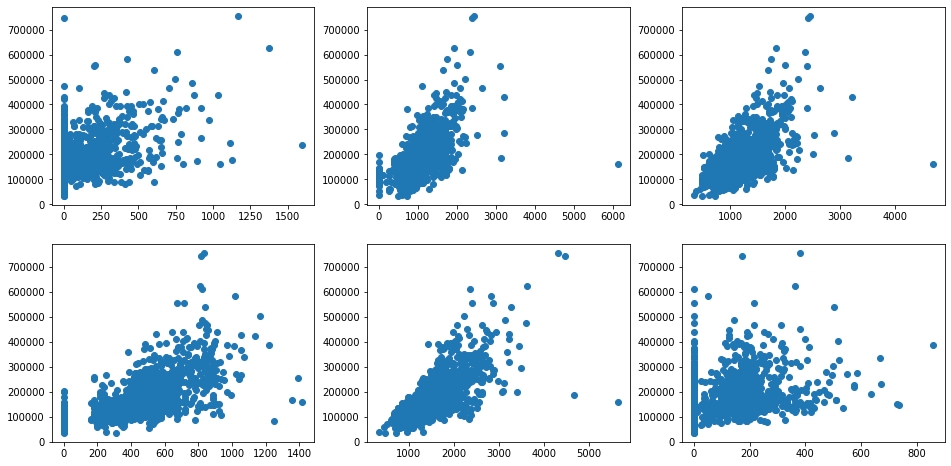

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price.MasVnrArea,house_price.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price.TotalBsmtSF,house_price.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price['1stFlrSF'],house_price.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price['GarageArea'],house_price.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price['GrLivArea'],house_price.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price['WoodDeckSF'],house_price.SalePrice)

__Plot heatmap for checking the correlation__

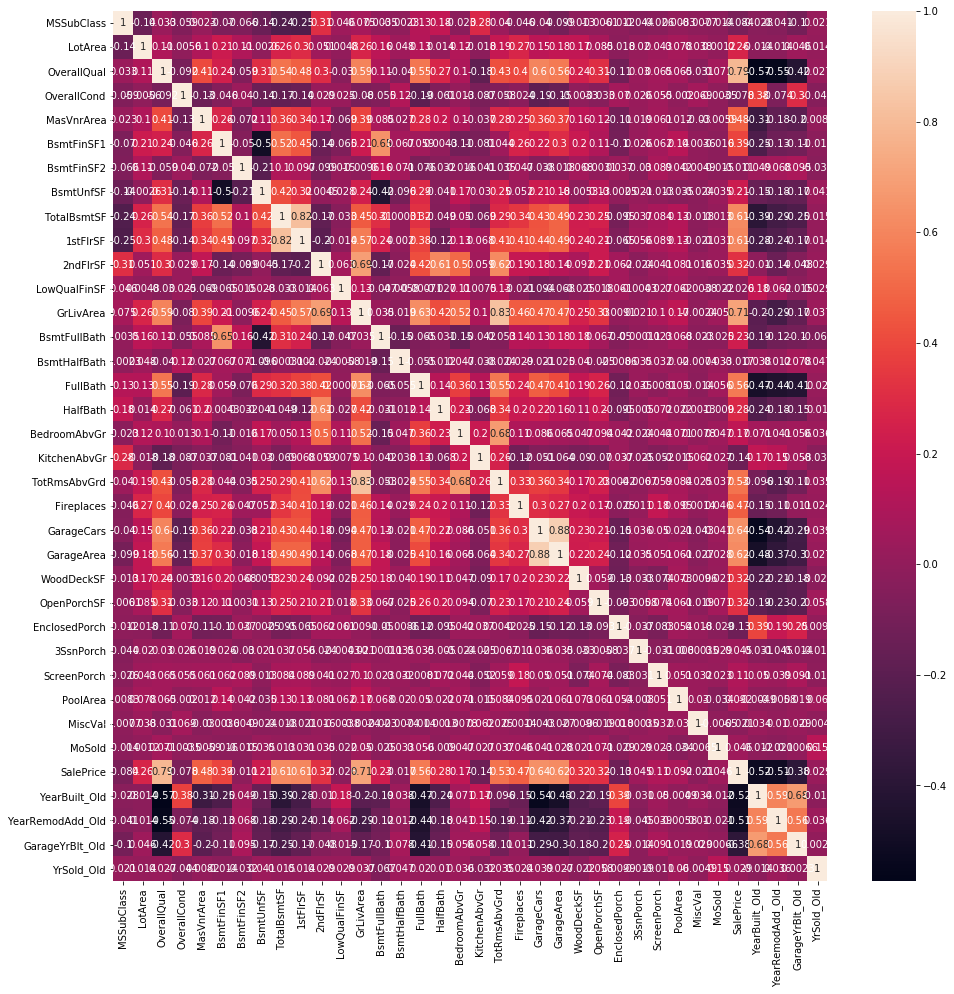

In [22]:
plt.figure(figsize=(16,16))
sns.heatmap(house_price.corr(),annot=True)
plt.show()

In [23]:
num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_Old',
 'YearRemodAdd_Old',
 'GarageYrBlt_Old',
 'YrSold_Old']

__Dealing with the outliers (Lets consider the 99 percentile as the threshold as of now)__

In [24]:
house_price.shape

(1460, 72)

In [25]:
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [26]:
house_price.shape

(1440, 72)

In [27]:
house_price[list(house_price.dtypes[house_price.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


__Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature__

In [28]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [29]:
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['BsmtQual'] = house_price.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtCond'] = house_price.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['BsmtFinType1'] = house_price.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['BsmtFinType2'] = house_price.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['GarageFinish'] = house_price.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageQual'] = house_price.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['GarageCond'] = house_price.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [30]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


__Lets create the dummy columns for the remaining categorical variables__

In [31]:
dummy_col = pd.get_dummies(house_price[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)
# Concat the dummy columns with the orignal dataset
house_price = pd.concat([house_price,dummy_col],axis=1)

# Drop the orignal columns now which is not reuired
house_price = house_price.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

## STEP 3 : Training the Model

In [32]:
# Splitting the data into train and test set
df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=101)

In [33]:
# Scaling the independent variables
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [34]:
# Splitting into X and y
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [35]:
X_train.shape

(1007, 193)

__Since there are so many columns (193), we are using RFE for eliminating some of the features.__

In [36]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=70, step=1, verbose=0)

In [37]:
rfe_details = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_details.columns = ['Column_Names','Status','Rank']

In [38]:
rfe_sel_columns = list(rfe_details[rfe_details.Status==True].Column_Names)

__Let's choose the columns in X_train and X_test supported by RFE__  

In [39]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

### Lets use LASSO Regression first

In [40]:
# Lets choose alpha as 0.001 as of now
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8853959886463957
0.8802225985118293


In [41]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.404),
 ('LotArea', -0.149),
 ('LotShape', 0.215),
 ('LandSlope', 0.139),
 ('OverallQual', 0.095),
 ('OverallCond', 0.137),
 ('MasVnrArea', 0.007),
 ('ExterQual', 0.0),
 ('ExterCond', -0.037),
 ('BsmtQual', 0.402),
 ('BsmtCond', 0.159),
 ('BsmtExposure', 0.171),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', -0.055),
 ('BsmtFinSF2', 0.159),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', 0.106),
 ('CentralAir', 0.144),
 ('1stFlrSF', 0.222),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.399),
 ('GrLivArea', 0.62),
 ('BsmtFullBath', 0.657),
 ('BsmtHalfBath', 0.304),
 ('FullBath', 0.084),
 ('HalfBath', 0.022),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.0),
 ('KitchenQual', 0.0),
 ('TotRmsAbvGrd', -2.111),
 ('Fireplaces', 0.232),
 ('GarageFinish', -0.0),
 ('GarageCars', -0.069),
 ('GarageArea', -0.0),
 ('GarageQual', 0.024),
 ('GarageCond', 0.0),
 ('WoodDeckSF', -0.17),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.015),
 ('3SsnPorch', -0.0),
 ('

__Now lets tune the hyperparameter for our model using GridSearchCV__

In [42]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [43]:
cv_result_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.044803,0.005308,0.0016,0.003201,0.001,{'alpha': 0.001},0.844809,0.930386,0.882209,0.869754,...,0.884857,0.886305,0.891372,0.883445,0.884747,0.888847,0.892724,0.892151,0.887326,0.003983
1,0.006403,0.003202,0.0016,0.003200,0.010,{'alpha': 0.01},0.807769,0.904534,0.844957,0.857840,...,0.840224,0.841449,0.845426,0.839233,0.839063,0.844799,0.862050,0.842247,0.843127,0.007177
2,0.004802,0.003921,0.0008,0.002400,0.100,{'alpha': 0.1},0.710385,0.840762,0.779914,0.811100,...,0.768030,0.772938,0.778888,0.768091,0.772226,0.776929,0.792025,0.764557,0.773294,0.008027
3,0.003998,0.003998,0.0016,0.003200,1.000,{'alpha': 1.0},-0.000309,-0.000328,-0.008116,-0.000026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001600,0.003200,0.0008,0.002400,5.000,{'alpha': 5.0},-0.000309,-0.000328,-0.008116,-0.000026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


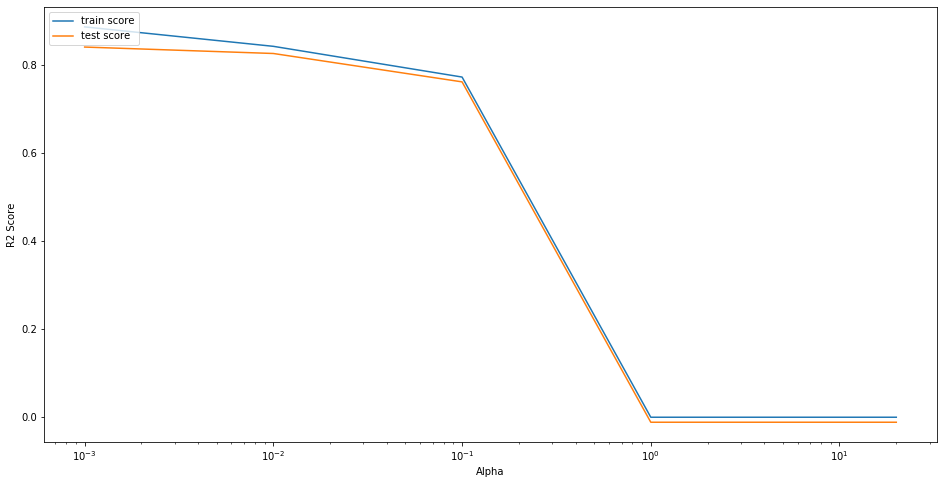

In [44]:
# Lets plot the alpha vs the model train and test score
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['train score','test score'], loc = 'upper left')
plt.show()

In [45]:
# Checking the best hyperparameter(Alpha value) for Lasso
model_cv.best_params_

{'alpha': 0.001}

In [46]:
# Choosing the best alpha and building the final model on that
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8853959886463957
0.8802225985118293


In [47]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficients']

In [48]:
lasso_coef.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
24,BsmtFullBath,0.657241
23,GrLivArea,0.619777
69,Neighborhood_IDOTRR,0.414859
9,BsmtQual,0.402426
22,LowQualFinSF,0.399402
...,...,...
1,LotArea,-0.148639
38,WoodDeckSF,-0.169786
60,LotConfig_Inside,-0.312055
0,MSSubClass,-1.403582


### Lets use RIDGE Regression now

In [49]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8935552674005646
0.8770275125794702


__Now lets tune the hyperparameter for our model using GridSearchCV__

In [50]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [51]:
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')
cv_result_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003998,0.003998,0.0016,0.003200,0.001,{'alpha': 0.001},0.851323,0.928084,0.889376,0.866510,...,0.892160,0.894232,0.899113,0.891764,0.893068,0.896478,0.900273,0.901807,0.895484,0.004055
1,0.005600,0.003666,0.0008,0.002401,0.010,{'alpha': 0.01},0.851434,0.928139,0.889279,0.866678,...,0.892159,0.894231,0.899112,0.891763,0.893067,0.896477,0.900273,0.901802,0.895483,0.004055
2,0.004000,0.004000,0.0032,0.003920,0.100,{'alpha': 0.1},0.852244,0.928546,0.888315,0.868086,...,0.892048,0.894125,0.899008,0.891658,0.892949,0.896382,0.900234,0.901431,0.895355,0.004025
3,0.004800,0.003920,0.0024,0.003666,0.200,{'alpha': 0.2},0.852705,0.928802,0.887293,0.869233,...,0.891784,0.893871,0.898759,0.891405,0.892668,0.896152,0.900139,0.900620,0.895058,0.003970
4,0.003200,0.003919,0.0016,0.003200,0.500,{'alpha': 0.5},0.852791,0.929083,0.884680,0.871364,...,0.890662,0.892740,0.897660,0.890261,0.891438,0.895122,0.899702,0.897570,0.893799,0.003860


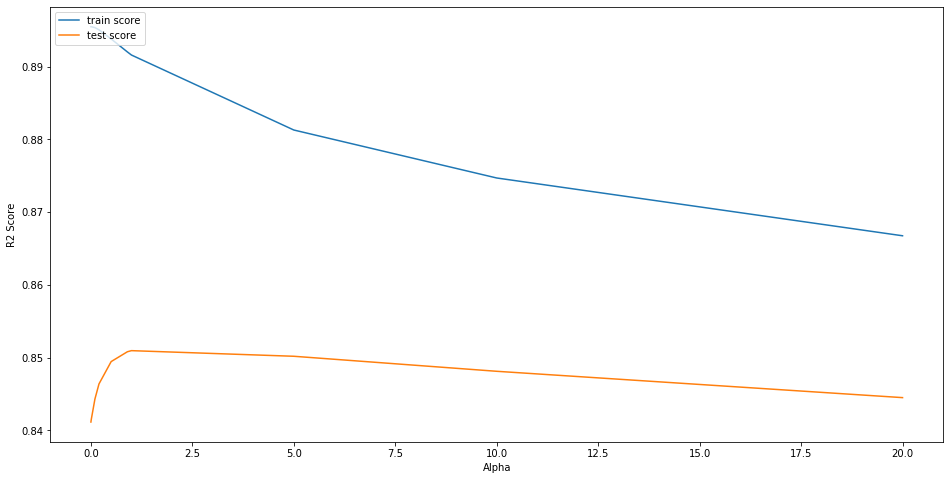

In [52]:
# Lets plot the alpha vs the model train and test score
plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.legend(['train score','test score'], loc = 'upper left')
plt.show()

In [53]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [54]:
# Lets biuld our final model using the hyperparameter obtained above
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8903488023066385
0.880313694031983


In [55]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [56]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
24,BsmtFullBath,0.718982
23,GrLivArea,0.648843
30,KitchenQual,0.509551
22,LowQualFinSF,0.438450
69,Neighborhood_IDOTRR,0.397575
25,BsmtHalfBath,0.353196
11,BsmtExposure,0.349145
32,Fireplaces,0.305147
40,EnclosedPorch,0.278318
20,1stFlrSF,0.262532


## Conclusion

__After creating model using both Lasso and Rigde, We can see that the r2_scores are almost same for both of them but as lasso will penalize for using more variables and therefore help in feature elemination We will consider that to build the final model.__

### __FINAL MODEL__

In [57]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8853959886463957
0.8802225985118293


In [58]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficients']

In [59]:
lasso_coef.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
24,BsmtFullBath,0.657241
23,GrLivArea,0.619777
69,Neighborhood_IDOTRR,0.414859
9,BsmtQual,0.402426
22,LowQualFinSF,0.399402
25,BsmtHalfBath,0.303979
32,Fireplaces,0.232096
20,1stFlrSF,0.221806
2,LotShape,0.215184
11,BsmtExposure,0.171275


__Best alpha value for Lasso : {'alpha': 0.001}__ <br>
__Best alpha value for Ridge : {'alpha': 1.0}__

__----------------------------------------------------------------------------------------------------------------------__

__Subjective question work__

1) What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [60]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.87883378725357
0.8812563391039133


In [61]:
ridge = Ridge(alpha=2.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8870868656244604
0.8814344274016168


2) What will be the most important predictor variables after the change is implemented?

In [62]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Features','Coefficients']

In [63]:
lasso_coef.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
23,GrLivArea,0.571727
24,BsmtFullBath,0.566557
9,BsmtQual,0.397893
69,Neighborhood_IDOTRR,0.395392
22,LowQualFinSF,0.350339
2,LotShape,0.224892
25,BsmtHalfBath,0.198898
20,1stFlrSF,0.175230
10,BsmtCond,0.166061
15,BsmtFinSF2,0.142792


In [64]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [65]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
24,BsmtFullBath,0.666169
23,GrLivArea,0.619218
22,LowQualFinSF,0.419500
69,Neighborhood_IDOTRR,0.390080
30,KitchenQual,0.354833
25,BsmtHalfBath,0.323673
32,Fireplaces,0.285050
11,BsmtExposure,0.275964
20,1stFlrSF,0.251101
9,BsmtQual,0.226105
